## Анализ энергопотребления в Нидерландах за 2011-2020 гг. по 3м копманиям

#### Вопросы на которые нужно ответить:

Как распространяются умные счетчики?
Какова тенденция развития отечественной энергетики (солнечные панели)? 
Можем ли мы увидеть, много ли в районе электромобилей?
Каким будет потребление энергии в следующем году?

#### Столбцы в каждом файле:

net_manager: код администратора региональной сети - удалить 
Purchase_area: код области, где покупается энергия - удалить
street: Название улицы - удалить
zipcode_from и zipcode_to: 2 столбца для диапазона охватываемых почтовых индексов, 4 цифры и 2 буквы - удалить
city: Название города
num_connections: количество подключений в диапазоне почтовых индексов.
delivery_perc: процент от чистого потребления электроэнергии или газа. Чем ниже, тем больше энергии было возвращено в сеть (например, если у вас есть солнечные батареи)
perc_of_active_connections: процент активных подключений в диапазоне почтовых индексов.
type_of_connection: основной тип соединения в диапазоне почтовых индексов. Для электричества стоит # предохранители X # ampère. Для газа - G4, G6, G10, G16, G25
type_conn_perc: процент присутствия основного типа соединения в диапазоне почтовых индексов
Annual_consume: Годовое потребление. КВтч на электроэнергию, м3 на газ
Annual_consume_lowtarif_perc: процент потребления в часы с низким тарифом. С 22:00 до 7 утра и в выходные дни.
smartmeter_perc: процент смартметров в диапазонах почтовых индексов


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import io
import requests
import seaborn as sns
import statistics
import traceback
%matplotlib inline

1. Данные компании Liander, сначало по электричеству-df_LE, потом по газу df_LG

In [3]:
#загружаем данные 
df_LE_1 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/liander_electricity_01012011.csv', delimiter= ',')
df_LE_1['year'] = '2011'
df_LE_2 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/liander_electricity_01012012.csv', delimiter= ',')
df_LE_2['year'] = '2012'
df_LE_3 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/liander_electricity_01012013.csv', delimiter= ',')
df_LE_3['year'] = '2013'
df_LE_4 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/liander_electricity_01012014.csv', delimiter= ',')
df_LE_4['year'] = '2014'
df_LE_5 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/liander_electricity_01012015.csv', delimiter= ',')
df_LE_5['year'] = '2015'
df_LE_6 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/liander_electricity_01012016.csv', delimiter= ',')
df_LE_6['year'] = '2016'
df_LE_7 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/liander_electricity_01012017.csv', delimiter= ',')
df_LE_7['year'] = '2017'
df_LE_8 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/liander_electricity_01012018.csv', delimiter= ',')
df_LE_8['year'] = '2018'
df_LE_9 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/liander_electricity_01012019.csv', delimiter= ',')
df_LE_9['year'] = '2019'
df_LE_10 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/liander_electricity_01012020.csv', delimiter= ',')
df_LE_10['year'] = '2020'
#объединяем в одну таблицу
df_LE=pd.concat([df_LE_1, df_LE_2, df_LE_3, df_LE_4, df_LE_5, df_LE_6, df_LE_7, df_LE_8, df_LE_9, df_LE_10])
#удаляем не нужные для анализа столюбы
df_LE = df_LE.drop(['net_manager', 'street', 'zipcode_from', 'zipcode_to'], axis=1)
#df_LE = df_LE.loc[(df_LE['city']=='AMSTERDAM')]

#df_LE['purchase_area'].where(~(df_LE.purchase_area == Liander), other=Liander, inplace=True)
df_LE = df_LE.replace({'purchase_area':{'Liander NW':'Liander', 'LIANDER':'Liander'}})

In [4]:
df_LE['purchase_area'].value_counts()
#purchase_area=649276
df_LE

,purchase_area,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
0,Liander,NIEUW VENNEP,16.0,100.00,68.75,44.00,3x25,8565.0,50.00,0.00,2011
1,Liander,AMSTERDAM,24.0,100.00,75.00,33.00,3x25,15694.0,37.50,0.00,2011
2,Liander,AMSTERDAM,33.0,100.00,72.73,30.00,3x25,11739.0,15.15,0.00,2011
3,Liander,AMSTERDAM,21.0,100.00,33.33,57.00,3x25,4557.0,47.62,0.00,2011
4,Liander,AMSTERDAM,19.0,100.00,36.84,68.00,3x25,3231.0,26.32,0.00,2011
...,...,...,...,...,...,...,...,...,...,...,...
143881,Liander,GERKESKLOOSTER,48.0,89.58,97.92,54.17,1x25,2669.0,75.00,31.25,2020
143882,Liander,GERKESKLOOSTER,10.0,90.00,100.00,50.00,3x25,3055.0,60.00,0.00,2020
143883,Liander,GERKESKLOOSTER,26.0,92.31,88.46,42.31,3x25,9276.0,73.08,15.38,2020
143884,Liander,GERKESKLOOSTER,11.0,72.73,72.73,36.36,3x25,12233.0,72.73,36.36,2020


2. Данные компании Stedin, сначало по электричеству-df_SE, потом по газу df_SG

In [5]:
df_SE_1 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/stedin_electricity_2011.csv', delimiter= ',')
df_SE_1['year'] = '2011'
df_SE_2 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/stedin_electricity_2012.csv', delimiter= ',')
df_SE_2['year'] = '2012'
df_SE_3 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/stedin_electricity_2013.csv', delimiter= ',')
df_SE_3['year'] = '2013'
df_SE_4 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/stedin_electricity_2014.csv', delimiter= ',')
df_SE_4['year'] = '2014'
df_SE_5 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/stedin_electricity_2015.csv', delimiter= ',')
df_SE_5['year'] = '2015'
df_SE_6 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/stedin_electricity_2016.csv', delimiter= ',')
df_SE_6['year'] = '2016'
df_SE_7 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/stedin_electricity_2017.csv', delimiter= ',')
df_SE_7['year'] = '2017'
df_SE_8 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/stedin_electricity_2018.csv', delimiter= ',')
df_SE_8['year'] = '2018'
df_SE_9 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/stedin_electricity_2019.csv', delimiter= ',')
df_SE_9['year'] = '2019'
df_SE_10 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/stedin_electricity_2020.csv', delimiter= ',')
df_SE_10['year'] = '2020'
#объединяем в одну таблицу
df_SE=pd.concat([df_SE_1, df_SE_2, df_SE_3, df_SE_4, df_SE_5, df_SE_6, df_SE_7, df_SE_8, df_SE_9, df_SE_10])
#удаляем не нужные для анализа столюбы
df_SE = df_SE.drop(['net_manager', 'street', 'zipcode_from', 'zipcode_to'], axis=1)
#df_SE = df_SE.loc[(df_SE['city']=='AMSTERDAM')]
df_SE = df_SE.replace({'purchase_area':{'Stedin Utrecht':'Stedin', 'Stedin Delfland':'Stedin', 'Stedin Midden-Holland':'Stedin', 'Stedin Schiedam':'Stedin', 'Stedin Elektriciteit Zuid-Kennemerland':'Stedin', 'Stedin Weert':'Stedin',}})

In [6]:
df_SE['purchase_area'].value_counts()
df_SE

,purchase_area,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year,STANDAARDDEVIATIE
0,Stedin,AMSTELVEEN,32,100.00,93.75,78.00,3x25,5948.00,81.25,0.00,2011,NaN
1,Stedin,LOOSDRECHT,17,100.00,100.00,41.00,1x25,3467.00,76.47,0.00,2011,NaN
2,Stedin,LOOSDRECHT,17,100.00,100.00,41.00,1x25,3880.00,64.71,0.00,2011,NaN
3,Stedin,LOOSDRECHT,20,100.00,100.00,45.00,1x25,4699.00,85.00,0.00,2011,NaN
4,Stedin,LOOSDRECHT,17,100.00,100.00,71.00,1x25,4039.00,64.71,0.00,2011,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
86333,Stedin,ODIJK,15,86.67,100.00,46.67,3x25,3014.27,100.00,93.33,2020,"1025,8079"
86334,Stedin,ODIJK,20,80.00,100.00,45.00,1x25,3259.75,100.00,75.00,2020,"1651,6757"
86335,Stedin,ODIJK,14,50.00,100.00,50.00,3x25,2872.93,92.86,78.57,2020,"1485,3644"
86336,Stedin,ODIJK,18,66.67,100.00,44.44,1x25,4248.83,100.00,94.44,2020,"1650,3948"


3. Данные компании Westland, сначало по электричеству-df_WE, потом по газу df_WG

In [7]:
df_WE_1 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/westland-infra_electricity_2011.csv', delimiter= ',')
df_WE_1['year'] = '2011'
df_WE_2 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/westland-infra_electricity_2012.csv', delimiter= ',')
df_WE_2['year'] = '2012'
df_WE_3 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/westland-infra_electricity_2013.csv', delimiter= ',')
df_WE_3['year'] = '2013'
df_WE_4 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/westland-infra_electricity_2014.csv', delimiter= ',')
df_WE_4['year'] = '2014'
df_WE_5 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/westland-infra_electricity_2015.csv', delimiter= ',')
df_WE_5['year'] = '2015'
df_WE_6 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/westland-infra_electricity_2016.csv', delimiter= ',')
df_WE_6['year'] = '2016'
df_WE_7 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/westland-infra_electricity_2017.csv', delimiter= ',')
df_WE_7['year'] = '2017'
df_WE_8 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/westland-infra_electricity_2018.csv', delimiter= ',')
df_WE_8['year'] = '2018'
df_WE_9 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/westland-infra_electricity_2019.csv', delimiter= ',')
df_WE_9['year'] = '2019'
df_WE_10 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Electricity/westland-infra_electricity_2020.csv', delimiter= ',')
df_WE_10['year'] = '2020'
#объединяем в одну таблицу
df_WE=pd.concat([df_WE_1, df_WE_2, df_WE_3, df_WE_4, df_WE_5, df_WE_6, df_WE_7, df_WE_8, df_WE_9, df_WE_10])


#df_WE = df_WE.loc[(df_WE['city']=='AMSTERDAM')]
#переименовываем столбцы, так чтобы были одинаковые названия столбцов и наполнение
df_WE = df_WE.rename(columns={'net_manager': 'purchase_area', 'purchase_area': 'net_manager'})
#удаляем не нужные для анализа столюбы
df_WE = df_WE.drop(['street', 'zipcode_from', 'zipcode_to'], axis=1)
df_WE = df_WE.replace({'purchase_area':{'westland-infra':'Westland'}})

In [8]:
df_WE['purchase_area'].value_counts()

Westland    24342
Name: purchase_area, dtype: int64

In [9]:
df_electricity = pd.concat([df_LE, df_SE, df_WE])
df_electricity.head(10)

,purchase_area,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year,STANDAARDDEVIATIE,net_manager,%Defintieve aansl (NRM)
0,Liander,NIEUW VENNEP,16.0,100.0,68.75,44.0,3x25,8565.0,50.00,0.0,2011,NaN,NaN,NaN
1,Liander,AMSTERDAM,24.0,100.0,75.00,33.0,3x25,15694.0,37.50,0.0,2011,NaN,NaN,NaN
2,Liander,AMSTERDAM,33.0,100.0,72.73,30.0,3x25,11739.0,15.15,0.0,2011,NaN,NaN,NaN
3,Liander,AMSTERDAM,21.0,100.0,33.33,57.0,3x25,4557.0,47.62,0.0,2011,NaN,NaN,NaN
4,Liander,AMSTERDAM,19.0,100.0,36.84,68.0,3x25,3231.0,26.32,0.0,2011,NaN,NaN,NaN
5,Liander,AMSTERDAM,12.0,100.0,91.67,58.0,3x25,14012.0,41.67,0.0,2011,NaN,NaN,NaN
6,Liander,AMSTERDAM,21.0,100.0,100.00,67.0,1x25,3570.0,14.29,0.0,2011,NaN,NaN,NaN
7,Liander,AMSTERDAM,18.0,100.0,94.44,39.0,1x25,2562.0,11.11,0.0,2011,NaN,NaN,NaN
8,Liander,AMSTERDAM,13.0,100.0,92.31,62.0,3x25,9582.0,38.46,0.0,2011,NaN,NaN,NaN
9,Liander,AMSTERDAM,14.0,100.0,92.86,64.0,3x25,7674.0,42.86,0.0,2011,NaN,NaN,NaN


In [10]:
df_electricity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2249160 entries, 0 to 2556
Data columns (total 14 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   purchase_area                 object 
 1   city                          object 
 2   num_connections               float64
 3   delivery_perc                 float64
 4   perc_of_active_connections    float64
 5   type_conn_perc                float64
 6   type_of_connection            object 
 7   annual_consume                float64
 8   annual_consume_lowtarif_perc  float64
 9   smartmeter_perc               float64
 10  year                          object 
 11  STANDAARDDEVIATIE             object 
 12  net_manager                   float64
 13  %Defintieve aansl (NRM)       float64
dtypes: float64(9), object(5)
memory usage: 257.4+ MB


In [11]:
df_electricity.describe()

,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,net_manager,%Defintieve aansl (NRM)
count,2.249160e+06,2.249160e+06,2.249160e+06,2.249160e+06,2.249160e+06,2.249160e+06,2.249160e+06,2.434200e+04,24342.0
mean,2.414866e+01,9.583380e+01,9.509402e+01,7.615655e+01,4.323582e+03,6.279247e+01,2.542192e+01,8.716878e+17,100.0
std,1.705755e+01,9.402072e+00,1.172804e+01,1.927570e+01,3.529445e+03,3.227109e+01,3.259335e+01,1.760036e+05,0.0
min,6.000000e+00,0.000000e+00,0.000000e+00,1.667000e+01,0.000000e+00,0.000000e+00,0.000000e+00,8.716878e+17,100.0
25%,1.600000e+01,9.524000e+01,9.459000e+01,6.000000e+01,2.563000e+03,3.529000e+01,0.000000e+00,8.716878e+17,100.0
50%,2.100000e+01,1.000000e+02,1.000000e+02,7.900000e+01,3.367000e+03,6.923000e+01,8.330000e+00,8.716878e+17,100.0
75%,2.700000e+01,1.000000e+02,1.000000e+02,9.400000e+01,4.558000e+03,9.375000e+01,4.615000e+01,8.716878e+17,100.0
max,1.146000e+03,1.000000e+02,1.000000e+02,1.000000e+02,1.108570e+05,1.000000e+02,1.000000e+02,8.716878e+17,100.0


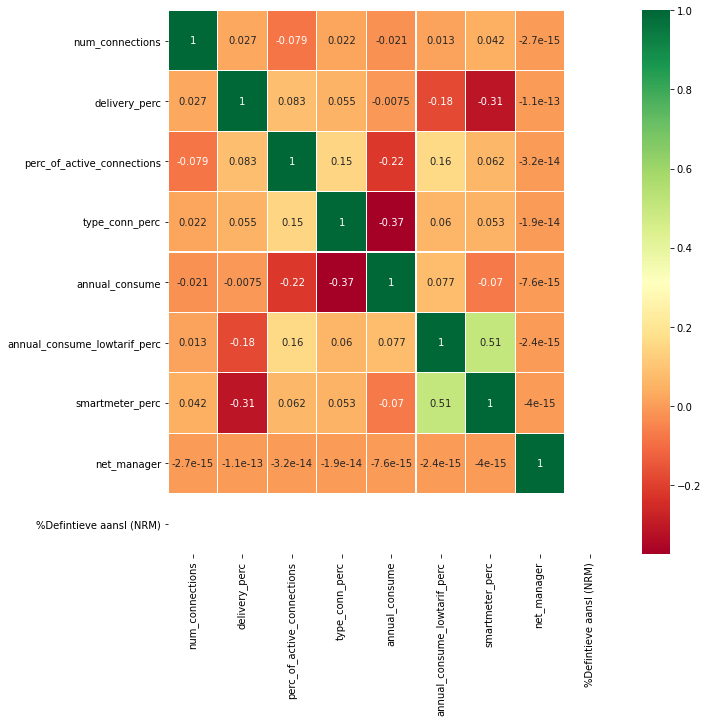

In [12]:
#Рассчитать и визуализировать корреляционную матрицу для количественных переменных.
#Определяем две самые скоррелированные и две наименее скоррелированные переменные.
sns.heatmap(df_electricity.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [13]:
df_electricity.corr()

,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,net_manager,%Defintieve aansl (NRM)
num_connections,1.000000e+00,2.652863e-02,-7.932157e-02,2.183031e-02,-2.136983e-02,1.262372e-02,4.181027e-02,-2.720703e-15,NaN
delivery_perc,2.652863e-02,1.000000e+00,8.285132e-02,5.488297e-02,-7.513338e-03,-1.793892e-01,-3.104357e-01,-1.076956e-13,NaN
perc_of_active_connections,-7.932157e-02,8.285132e-02,1.000000e+00,1.486746e-01,-2.158451e-01,1.600449e-01,6.176708e-02,-3.152848e-14,NaN
type_conn_perc,2.183031e-02,5.488297e-02,1.486746e-01,1.000000e+00,-3.745475e-01,5.984205e-02,5.296846e-02,-1.882362e-14,NaN
annual_consume,-2.136983e-02,-7.513338e-03,-2.158451e-01,-3.745475e-01,1.000000e+00,7.655647e-02,-6.972545e-02,-7.591948e-15,NaN
annual_consume_lowtarif_perc,1.262372e-02,-1.793892e-01,1.600449e-01,5.984205e-02,7.655647e-02,1.000000e+00,5.095297e-01,-2.406005e-15,NaN
smartmeter_perc,4.181027e-02,-3.104357e-01,6.176708e-02,5.296846e-02,-6.972545e-02,5.095297e-01,1.000000e+00,-3.979134e-15,NaN
net_manager,-2.720703e-15,-1.076956e-13,-3.152848e-14,-1.882362e-14,-7.591948e-15,-2.406005e-15,-3.979134e-15,1.000000e+00,NaN
%Defintieve aansl (NRM),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Положительная корр-я: Annual_consume_lowtarif_perc (процент потребления в часы с низким тарифом. С 22:00 до 7 утра и в выходные дни) зависит от smartmeter_perc (процент смартметров в диапазонах почтовых индексов); perc_of_active_connections (процент активных подключений в диапазоне почтовых индексов) зависит от type_conn_perc (процент присутствия основного типа соединения в диапазоне почтовых индексов). 
Отрицательная корр-я: Annual_consume (Годовое потребление. КВтч на электроэнергию, м3 на газ) зависит от type_conn_perc (процент присутствия основного типа соединения в диапазоне почтовых индексов); smartmeter_perc (процент смартметров в диапазонах почтовых индексов) зависит от delivery_perc (процент от чистого потребления электроэнергии или газа. Чем ниже, тем больше энергии было возвращено в сеть (например, если у вас есть солнечные батареи))

In [14]:
#рассчитаем сколько подключений по компаниям за 10 лет
df_num_elec=df_electricity['purchase_area'].value_counts().reset_index()
df_num_elec = df_num_elec.rename(columns={'index': 'purchase_area', 'purchase_area': 'num_connections'})
df_num_elec

,purchase_area,num_connections
0,Stedin,835846
1,Liander,649276
2,Westland,24342


In [15]:
import xlsxwriter
writer = pd.ExcelWriter('C:/Users/Hastya/Desktop/Netology/Finish_diplom/df_elect.xlsx', engine='xlsxwriter')
df_num_elec.to_excel(writer, 'df_elec', index=False) #новый лист удаляет старые
writer.save()
#слишком большой объем данных не загружается в excel

In [16]:
#построить график

In [17]:
df_salary = df.groupby(['salary']).count().reset_index() 
df_salary

NameError: name 'df' is not defined

In [18]:
#загружаем данные 
df_LG_1 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/gas/liander_gas_01012011.csv', delimiter= ',')
df_LG_1['year'] = '2011'
df_LG_2 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/gas/liander_gas_01012012.csv', delimiter= ',')
df_LG_2['year'] = '2012'
df_LG_3 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/gas/liander_gas_01012013.csv', delimiter= ',')
df_LG_3['year'] = '2013'
df_LG_4 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/gas/liander_gas_01012014.csv', delimiter= ',')
df_LG_4['year'] = '2014'
df_LG_5 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/gas/liander_gas_01012015.csv', delimiter= ',')
df_LG_5['year'] = '2015'
df_LG_6 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/gas/liander_gas_01012016.csv', delimiter= ',')
df_LG_6['year'] = '2016'
df_LG_7 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/gas/liander_gas_01012017.csv', delimiter= ',')
df_LG_7['year'] = '2017'
df_LG_8 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/gas/liander_gas_01012018.csv', delimiter= ',')
df_LG_8['year'] = '2018'
df_LG_9 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/gas/liander_gas_01012019.csv', delimiter= ',')
df_LG_9['year'] = '2019'
df_LG_10 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/gas/liander_gas_01012020.csv', delimiter= ',')
df_LG_10['year'] = '2020'
#объединяем в одну таблицу
df_LG=pd.concat([df_LG_1, df_LG_2, df_LG_3, df_LG_4, df_LG_5, df_LG_6, df_LG_7, df_LG_8, df_LG_9, df_LG_10]) 
#удаляем не нужные для анализа столю
df_LG = df_LG.rename(columns={'net_manager': 'purchase_area', 'purchase_area': 'net_manager'})
df_LG = df_LG.drop(['street', 'zipcode_from', 'zipcode_to'], axis=1)
#df_LG = df_LG.loc[(df_LG['city']=='AMSTERDAM')]
df_LG = df_LG.replace({'purchase_area':{'GAS Liander':'Liander', 'Liander NB': 'Liander'}})

In [19]:
df_LG['purchase_area'].value_counts()

Liander    1117403
Name: purchase_area, dtype: int64

In [20]:
df_SG_1 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Gas/stedin_gas_2011.csv', delimiter= ',')
df_SG_1['year'] = '2011'
df_SG_2 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Gas/stedin_gas_2012.csv', delimiter= ',')
df_SG_2['year'] = '2012'
df_SG_3 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Gas/stedin_gas_2013.csv', delimiter= ',')
df_SG_3['year'] = '2013'
df_SG_4 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Gas/stedin_gas_2014.csv', delimiter= ',')
df_SG_4['year'] = '2014'
df_SG_5 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Gas/stedin_gas_2015.csv', delimiter= ',')
df_SG_5['year'] = '2015'
df_SG_6 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Gas/stedin_gas_2016.csv', delimiter= ',')
df_SG_6['year'] = '2016'
df_SG_7 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Gas/stedin_gas_2017.csv', delimiter= ',')
df_SG_7['year'] = '2017'
df_SG_8 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Gas/stedin_gas_2018.csv', delimiter= ',')
df_SG_8['year'] = '2018'
df_SG_9 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Gas/stedin_gas_2019.csv', delimiter= ',')
df_SG_9['year'] = '2019'
df_SG_10 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Gas/stedin_gas_2020.csv', delimiter= ',')
df_SG_10['year'] = '2020'
#объединяем в одну таблицу
df_SG=pd.concat([df_SG_1, df_SG_2, df_SG_3, df_SG_4, df_SG_5, df_SG_6, df_SG_7, df_SG_8, df_SG_9, df_SG_10])
#удаляем не нужные для анализа столюбы
df_SG = df_SG.drop(['street', 'zipcode_from', 'zipcode_to'], axis=1)
#df_SG = df_SG.loc[(df_SG['city']=='AMSTERDAM')]
df_SG = df_SG.replace({'purchase_area':{'NG Den Haag':'Stedin', 'Pseudo Gos Houten ENBU':'Stedin', 
                                       'Pseudo-GOS Dordrecht':'Stedin', 'Pseudo-GOS Rotterdam':'Stedin', 
                                       'Pseudo Gos Hoogland ENBU': 'Stedin', 'NG Leerdam':'Stedin',
                                       'NG Hoekse waard':'Stedin', 'Schiedam Kethel':'Stedin',
                                        'Schiedam Kethel':'Stedin', 'Weert Trancheeweg':'Stedin',
                                       'Pseudo-GOS Zoetermeer':'Stedin', '':'Stedin',
                                       'Pseudo Gos Veenendaal ENBU':'Stedin', 'NG Gouda':'Stedin', 
                                        'Wildersekade':'Stedin', 'Graswalseweg':'Stedin', 
                                        'Duivendrecht':'Stedin', 'Moerseweg':'Stedin',
                                       'Pseudo-GOS Vlaardingen':'Stedin', 'Hoek van Holland':'Stedin', 
                                        'Hoek van Holland':'Stedin', 'Pseudo-GOS Midden Kennemerland':'Stedin', 
                                        'Achterweg':'Stedin', 'Pseudo-GOS Weert':'Stedin',
                                       'Pseudo-GOS Zeist':'Stedin', 'NG Noord-Oost Friesland':'Stedin',
                                       'Pseudo-GOS Amstelland':'Stedin', 'NG Heemstede':'Stedin',
                                       'Pseudo-GOS Delft':'Stedin', 'NG Brielle':'Stedin',
                                       'Pseudo-GOS Bleiswijk':'Stedin', 'Oranjelaan':'Stedin',
                                       'NG Krimpen':'Stedin', 'NG Waddinxveen':'Stedin',
                                       'Maassluis':'Stedin', 'Ouderkerk ad Amstel':'Stedin',
                                       'Ameland':'Stedin', 'Halfweg':'Stedin',
                                       'Ruigendijk':'Stedin'}})

In [21]:
df_SG['purchase_area'].value_counts()

Stedin    855444
Name: purchase_area, dtype: int64

In [22]:
df_WG_1 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Gas/westland-infra_gas_2011.csv', delimiter= ',')
df_WG_1['year'] = '2011'
df_WG_2 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Gas/westland-infra_gas_2012.csv', delimiter= ',')
df_WG_2['year'] = '2012'
df_WG_3 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Gas/westland-infra_gas_2013.csv', delimiter= ',')
df_WG_3['year'] = '2013'
df_WG_4 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Gas/westland-infra_gas_2014.csv', delimiter= ',')
df_WG_4['year'] = '2014'
df_WG_5 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Gas/westland-infra_gas_2015.csv', delimiter= ',')
df_WG_5['year'] = '2015'
df_WG_6 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Gas/westland-infra_gas_2016.csv', delimiter= ',')
df_WG_6['year'] = '2016'
df_WG_7 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Gas/westland-infra_gas_2017.csv', delimiter= ',')
df_WG_7['year'] = '2017'
df_WG_8 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Gas/westland-infra_gas_2018.csv', delimiter= ',')
df_WG_8['year'] = '2018'
df_WG_9 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Gas/westland-infra_gas_2019.csv', delimiter= ',')
df_WG_9['year'] = '2019'
df_WG_10 = pd.read_csv('C:/Users/Hastya/Desktop/Netology/Finish_diplom/Gas/westland-infra_gas_2020.csv', delimiter= ',')
df_WG_10['year'] = '2020'
#объединяем в одну таблицу
df_WG=pd.concat([df_WG_1, df_WG_2, df_WG_3, df_WG_4, df_WG_5, df_WG_6, df_WG_7, df_WG_8, df_WG_9, df_WG_10])


#df_WG = df_WG.loc[(df_WG['city']=='AMSTERDAM')]
#переименовываем столбцы, так чтобы были одинаковые названия столбцов и наполнение
df_WG = df_WG.rename(columns={'net_manager': 'purchase_area', 'purchase_area': 'net_manager'})
#удаляем не нужные для анализа столюбы
df_WG = df_WG.drop(['street', 'zipcode_from', 'zipcode_to'], axis=1)
df_WG = df_WG.replace({'purchase_area':{'westland-infra':'Westland'}})

In [23]:
df_WG['purchase_area'].value_counts()

Westland    23135
Name: purchase_area, dtype: int64

In [24]:
df_gas = pd.concat([df_LG, df_SG, df_WG])
df_gas.head()

,purchase_area,net_manager,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year,STANDAARDDEVIATIE,%Defintieve aansl (NRM)
0,Liander,GAS Gastransport Services (GASUNIE),AMSTERDAM,22.0,100.0,77.27,45.0,G4,3849.0,0.0,0.0,2011,NaN,NaN
1,Liander,GAS Gastransport Services (GASUNIE),AMSTERDAM,11.0,100.0,63.64,82.0,G4,1231.0,0.0,0.0,2011,NaN,NaN
2,Liander,GAS Gastransport Services (GASUNIE),AMSTERDAM,27.0,100.0,100.00,93.0,G4,2075.0,0.0,0.0,2011,NaN,NaN
3,Liander,GAS Gastransport Services (GASUNIE),AMSTERDAM,15.0,100.0,93.33,60.0,G4,1496.0,0.0,0.0,2011,NaN,NaN
4,Liander,GAS Gastransport Services (GASUNIE),AMSTERDAM,27.0,100.0,88.89,89.0,G4,2004.0,0.0,0.0,2011,NaN,NaN


In [25]:
df_num_gas=df_gas['purchase_area'].value_counts().reset_index()
df_num_gas = df_num_gas.rename(columns={'index': 'purchase_area', 'purchase_area': 'num_connections'})
df_num_gas

,purchase_area,num_connections
0,Liander,1117403
1,Stedin,855444
2,Westland,23135


In [26]:
import xlsxwriter
writer = pd.ExcelWriter('C:/Users/Hastya/Desktop/Netology/Finish_diplom/df_gas.xlsx', engine='xlsxwriter')
df_num_gas.to_excel(writer, 'df_gas', index=False) #новый лист удаляет старые
writer.save()

In [27]:
df_gas.describe()

,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,STANDAARDDEVIATIE,%Defintieve aansl (NRM)
count,1.995983e+06,1.995983e+06,1.995983e+06,1.995983e+06,1.995983e+06,1995983.0,1.995983e+06,0.0,23135.0
mean,2.246360e+01,9.999990e+01,9.763148e+01,9.263947e+01,1.699243e+03,0.0,2.494262e+01,NaN,100.0
std,1.378098e+01,7.406254e-02,9.106939e+00,1.247783e+01,1.053792e+03,0.0,3.285947e+01,NaN,0.0
min,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,NaN,100.0
25%,1.500000e+01,1.000000e+02,1.000000e+02,9.048000e+01,1.140000e+03,0.0,0.000000e+00,NaN,100.0
50%,2.000000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.478000e+03,0.0,7.690000e+00,NaN,100.0
75%,2.500000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.988000e+03,0.0,4.375000e+01,NaN,100.0
max,1.065000e+03,1.000000e+02,1.000000e+02,1.000000e+02,3.353300e+04,0.0,1.000000e+02,NaN,100.0


In [28]:
df_gas.corr()

,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,STANDAARDDEVIATIE,%Defintieve aansl (NRM)
num_connections,1.000000,-0.000482,-0.050523,0.035932,-0.087889,NaN,0.028107,NaN,NaN
delivery_perc,-0.000482,1.000000,0.009789,-0.000217,0.000073,NaN,0.000743,NaN,NaN
perc_of_active_connections,-0.050523,0.009789,1.000000,0.099157,-0.043439,NaN,0.056406,NaN,NaN
type_conn_perc,0.035932,-0.000217,0.099157,1.000000,-0.621805,NaN,0.127229,NaN,NaN
annual_consume,-0.087889,0.000073,-0.043439,-0.621805,1.000000,NaN,-0.095582,NaN,NaN
annual_consume_lowtarif_perc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smartmeter_perc,0.028107,0.000743,0.056406,0.127229,-0.095582,NaN,1.000000,NaN,NaN
STANDAARDDEVIATIE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
%Defintieve aansl (NRM),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


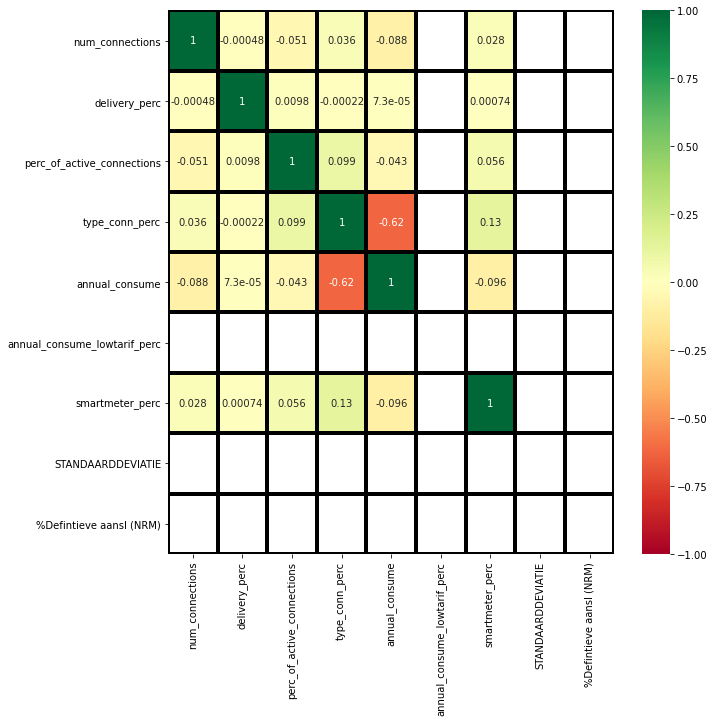

In [29]:
#Рассчитать и визуализировать корреляционную матрицу для количественных переменных.
#Определяем две самые скоррелированные и две наименее скоррелированные переменные.
sns.heatmap(df_gas.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0, cmap='RdYlGn', linewidths=3, linecolor='black')
#sns.heatmap(df_gas.corr(),annot=True,cmap='color',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()


#https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
#Хорошим приемом для уменьшения отображаемого числа и улучшения читабельности является вставка аргумента fmt =’.3g'